# Text Classification and Summarization of Amazon Reviews Using IBM Granite

## Instalasi & Import Library

In [13]:
# Install library
!pip install pandas numpy seaborn matplotlib wordcloud scikit-learn textblob

# Import library untuk data analysis, visualisasi, NLP, dan machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


 ## Membaca dan Menampilkan Dataset

In [14]:
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('amazon.csv')

# Menampilkan 5 baris pertama dari dataset
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Eksplorasi dan Pra-Pemrosesan

In [15]:
# Menampilkan informasi struktur dataset
df.info()

# Menghapus data yang tidak memiliki isi review
df = df.dropna(subset=['review_content'])

# Memastikan bahwa kolom review bertipe string
df['review_content'] = df['review_content'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Sentiment Analysis

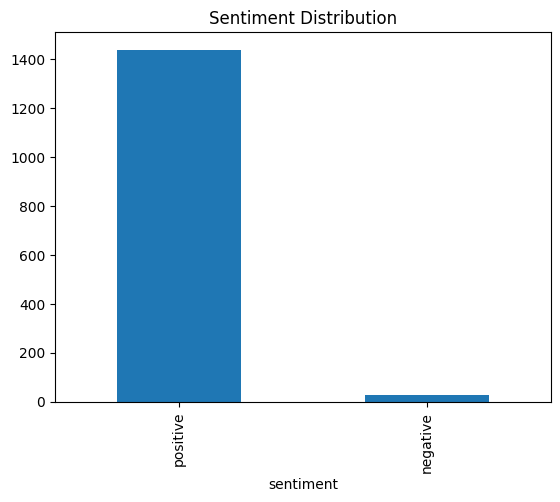

In [16]:
# Fungsi untuk menentukan sentimen dari review: positif jika polaritas > 0
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# Terapkan fungsi ke seluruh kolom review dan simpan hasilnya di kolom baru 'sentiment'
df['sentiment'] = df['review_content'].apply(get_sentiment)
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

# Visualisasi distribusi jumlah review berdasarkan sentimen
plt.show()

 ## WordCloud untuk Visualisasi Kata

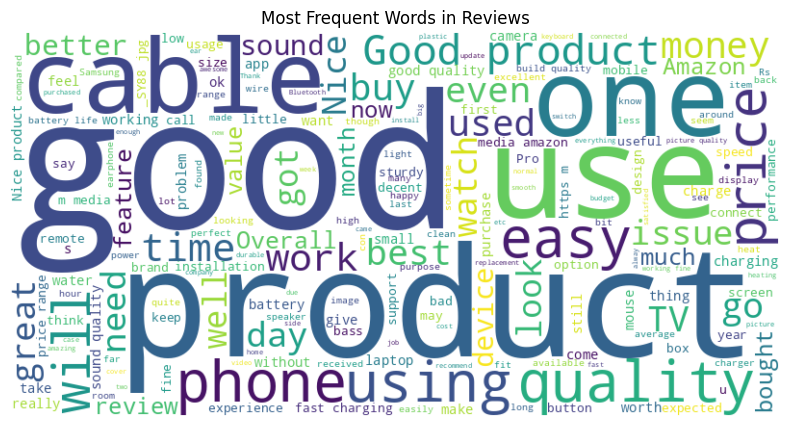

In [18]:
# Gabungkan semua teks review menjadi satu string besar
text = ' '.join(df['review_content'])

# Buat visualisasi WordCloud dari semua kata yang sering muncul
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan garis sumbu
plt.title("Most Frequent Words in Reviews")
plt.show()

## Text Classification dengan Naive Bayes

In [20]:
# Tentukan fitur (X) dan label (y)
X = df['review_content']
y = df['sentiment']

# Ubah teks menjadi vektor angka dengan metode Bag-of-Words
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Bagi data menjadi data latih dan data uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Tampilkan metrik evaluasi model: precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
    positive       0.99      1.00      0.99       290

    accuracy                           0.99       293
   macro avg       0.49      0.50      0.50       293
weighted avg       0.98      0.99      0.98       293



## Ringkasan Teks Positif dan Negatif

In [21]:
from textwrap import wrap

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review_content'][:100])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review_content'][:100])

print("Positive Summary:\n", '\n'.join(wrap(positive_reviews[:500], 80)))
print("\nNegative Summary:\n", '\n'.join(wrap(negative_reviews[:500], 80)))

Positive Summary:
 Looks durable Charging is fine tooNo complains,Charging is really fast, good
product.,Till now satisfied with the quality.,This is a good product . The
charging speed is slower than the original iPhone cable,Good quality, would
recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---
F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable
is also sturdy enough...Have asked for replacement and company is doing the
same...,Value for money I ordered this c

Negative Summary:
 Overall good.,TV picture ok smart betterSound very low another brand,Service
provider refuse install my TV, bad service and samsung, I am calling 3 times
service provider. Not meet my home address.why ? Bad bad,They product did not
come with the support stand or wall hanging hook to install the Tv,Picture
quality is very poor in cables,Floor stand does not come with it ... You have to
buy it seperately. Request Amazon to cleary mention it in the add . You